## Airbnb Scoring the name of listings using NLP technics

In [114]:
import json
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [66]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = ""
training_size = 2587

# total_size = len(sentences)  # or len(labels), since they are the same
# training_size = int(total_size * 0.8)  # 80% of the total size


In [67]:
nlp_test = pd.read_csv('nlp_test.csv')
nlp_df = pd.DataFrame(nlp_test)
nlp_df

,index,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,room_entire,room_private,room_shared,bed_airbed,bed_couch,bed_futon,bed_p_sofa,bed_real,Property_type_Apartment,Property_type_House,Property_type_Cabin,Property_type_Condominium,Property_type_Camper/RV,Property_type_Bungalow,Property_type_Townhouse,Property_type_Loft,Property_type_Boat,Property_type_Other,Property_type_Dorm,Property_type_Bed & Breakfast,Property_type_Yurt,Property_type_Chalet,Property_type_Tent,Property_type_Treehouse,calendar_updated_encoded,host_since_year,first_review_year,last_review_year,name_sentiment_polarity,space_sentiment_polarity,description_sentiment_polarity,hostabout_sentiment_polarity,amenities_count,index_number,name_distinguish,space_distinguish,description_distinguish,hostabout_distinguish
0,0,0.75,96.0,100.0,0,3.0,1,1,98119,47.636289,-122.371025,1,4,1.0,1.0,1.0,85.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0.5,0,0,2,4.07,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.000000,2011,2011,2016,0.500000,0.182917,0.182917,0.219792,10,205.0,1,1,1,1
1,1,1.00,98.0,100.0,1,6.0,1,1,98119,47.639123,-122.365666,1,4,1.0,1.0,1.0,150.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.0,1,1,6,1.48,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31.000000,2013,2013,2015,0.700000,0.397868,0.348630,0.000000,16,205.0,1,1,1,0
2,2,0.75,67.0,100.0,0,2.0,1,1,98119,47.629724,-122.369483,1,11,4.5,5.0,7.0,975.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.0,0,0,2,1.15,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19.000000,2014,2014,2015,0.168182,0.205905,0.273670,0.412500,21,205.0,1,1,1,1
3,4,1.00,100.0,100.0,0,2.0,1,1,98119,47.632918,-122.372471,1,6,2.0,3.0,3.0,450.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0.0,0,0,1,0.89,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,18.000000,2011,2012,2015,0.700000,0.288265,0.344451,0.315483,13,205.0,1,1,1,1
4,5,0.00,100.0,100.0,0,1.0,1,1,98119,47.630525,-122.366174,1,2,1.0,1.0,1.0,120.0,1,30.0,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.0,0,0,1,2.45,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,22.000000,2010,2015,2015,0.000000,0.328571,0.366942,0.350000,6,205.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,3810,1.00,100.0,100.0,0,1.0,1,1,98103,47.654205,-122.352604,1,5,1.0,2.0,3.0,154.0,4,50.0,2,14,13,43,73,227,5,92.0,9.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0,0,1,1.56,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27.000000,2011,2015,2015,0.000000,0.414286,0.322532,0.285195,22,189.0,0,1,1,1
3230,3811,0.75,100.0,100.0,0,1.0,1,1,98103,47.657898,-122.346692,1,3,1.0,1.0,1.0,65.0,1,0.0,1,1125,2,10,13,221,2,100.0,9.0,8.0,10.0,10.0,10.0,10.0,0,0.5,0,0,1,0.63,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.643564,2014,2015,2015,0.477778,0.319551,0.336184,0.000000,15,189.0,1,1,1,0
3231,3812,1.00,100.0,100.0,1,3.0,1,1,98107,47.654516,-122.358124,1,4,1.0,1.0,2.0,95.0,2,8.0,3,365,11,30,43,287,73,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1,0.5,1,1,3,4.01,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.000000,2012,2014,2015,0.468750,0.048701

In [68]:
listings = pd.read_csv('listings.csv')
listings_df = pd.DataFrame(listings)
listings_df.head(2)

,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [69]:
nlp_listings_df = listings_df[['index', 'name', 'description', 'host_about', 'space']]

In [70]:
nlp_nlp_df = nlp_df[['index', 'space_distinguish', 'name_distinguish', 'hostabout_distinguish', 'description_distinguish']] 

In [71]:
merged_df = pd.merge(nlp_listings_df, nlp_nlp_df, on='index')
merged_df.head(2)

,index,name,description,host_about,space,space_distinguish,name_distinguish,hostabout_distinguish,description_distinguish
0,0,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,"I am an artist, interior designer, and run a s...",Make your self at home in this charming one-be...,1,1,1,1
1,1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,Living east coast/left coast/overseas. Time i...,"Beautiful, hypoallergenic apartment in an extr...",1,1,0,1


In [72]:
columns_with_nan = merged_df.columns[merged_df.isna().any()].tolist()
print(columns_with_nan)

['host_about', 'space']


In [73]:
for index, item in merged_df.iterrows():
    sentences.append(item['name'])
    labels.append(item['name_distinguish'])

In [74]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [75]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [76]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_2  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
print(len(sentences), len(labels))

6468 6468


In [81]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
81/81 - 0s - loss: -6.2780e-01 - accuracy: 0.8183 - val_loss: -6.3282e-01 - val_accuracy: 0.7905 - 123ms/epoch - 2ms/step
Epoch 2/30
81/81 - 0s - loss: -7.4654e-01 - accuracy: 0.8152 - val_loss: -7.5184e-01 - val_accuracy: 0.8039 - 101ms/epoch - 1ms/step
Epoch 3/30
81/81 - 0s - loss: -8.7401e-01 - accuracy: 0.8148 - val_loss: -8.5964e-01 - val_accuracy: 0.7635 - 98ms/epoch - 1ms/step
Epoch 4/30
81/81 - 0s - loss: -1.0260e+00 - accuracy: 0.8199 - val_loss: -1.0190e+00 - val_accuracy: 0.7885 - 97ms/epoch - 1ms/step
Epoch 5/30
81/81 - 0s - loss: -1.1638e+00 - accuracy: 0.8222 - val_loss: -1.1572e+00 - val_accuracy: 0.8114 - 96ms/epoch - 1ms/step
Epoch 6/30
81/81 - 0s - loss: -1.3434e+00 - accuracy: 0.8288 - val_loss: -1.1939e+00 - val_accuracy: 0.7302 - 96ms/epoch - 1ms/step
Epoch 7/30
81/81 - 0s - loss: -1.5114e+00 - accuracy: 0.8245 - val_loss: -1.3781e+00 - val_accuracy: 0.7377 - 97ms/epoch - 1ms/step
Epoch 8/30
81/81 - 0s - loss: -1.6737e+00 - accuracy: 0.8199 - val_loss: -

In [83]:
## There is an issue regarding training_size
## Because my 'sentences' is only 3234 but I missed the size of data. Overly sizing
## we should check teh labels, padded shape if we faced this problem

print(training_padded.shape)
print(training_labels.shape)
print(testing_padded.shape)
print(testing_labels.shape)


(2587, 100)
(2587,)
(3881, 100)
(3881,)


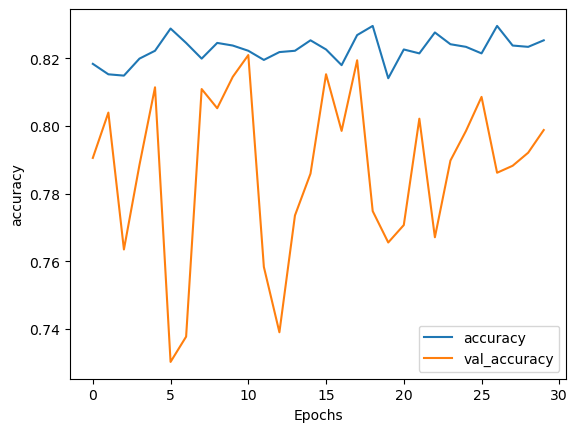

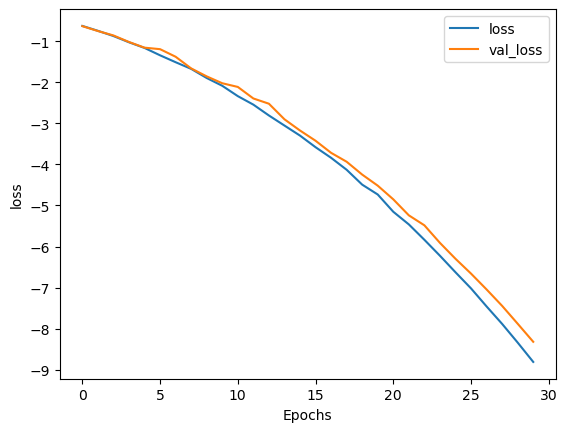

In [97]:
def plot_graphs(history, string):
  plt.plot(figsize=(4,4))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [99]:
# I do not understand what is the problem
# def plot_graphs(history, string):
#  plt.figure(figsize=(4,4))
#  plt.plot(history.history[string])
#  plt.plot(history.history['val_'+string])
#  plt.xlabel("Epochs")
#  plt.ylabel(string)
#  plt.legend([string, 'val'+string])
#  plt.show()
    
#  plot_graphs(history, "accuracy")
#  plot_graphs(history, "loss")

In [104]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

stylish queen anne apartment ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
New Modern House-Amazing water view
1


In [105]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [109]:
# import io

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# for word_num in range(1, vocab_size):
#     word = reverse_word_index[word_num]
#     embeddings = weights[word_num]
#     out_m.write(word + "\n")
#     out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

In [107]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index.get(word_num)
    if word is None:
        continue  # Skip if the word is not found
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [110]:
import os
print(os.getcwd())

/Users/minseokoh/Desktop/00. SCU/02. Data Analytics_Python/97. FInal project/00. Dataset/Final_preprocess/03. FInal3/Group6_2


In [111]:
output_dir = '/Users/minseokoh/Desktop/00. SCU/02. Data Analytics_Python/97. FInal project/00. Dataset/Final_preprocess/03. FInal3/Group6_2'
out_v = io.open(os.path.join(output_dir, 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(os.path.join(output_dir, 'meta.tsv'), 'w', encoding='utf-8')

In [113]:
sentence = ["Sunny Beachfront Haven", "Charming Downtown Loft"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 18ms/step
[[4.105857e-15]
 [1.000000e+00]]
